<div class='alert alert-info'>
    <h1 align="center">k-Nearest Neighbors (k-NN)</h1>
    <h3 align="center">Mo Rahdar</h3>
</div>

# Introduction

The k-Nearest Neighbors (k-NN) algorithm is a simple yet powerful supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric method, meaning it doesn't make any assumptions about the underlying data distribution.

Here's how the k-NN algorithm works:

1. **Training Phase**: During the training phase, the algorithm simply stores the feature vectors and their corresponding labels.

2. **Prediction Phase**:
   - For a given unlabeled data point (query point), the algorithm calculates the distances between this point and all the labeled data points in the training set. The distance metric commonly used is Euclidean distance, but other distance metrics such as Manhattan distance, Minkowski distance, etc., can also be used.
   - After calculating distances, the algorithm selects the k-nearest data points (neighbors) to the query point. "k" is a predefined hyperparameter set by the user.
   - For classification tasks, the algorithm then assigns the query point to the class that appears most frequently among the k-nearest neighbors (i.e., by majority voting). For regression tasks, it predicts the output value as the average of the output values of its k-nearest neighbors.
   
The choice of "k" is crucial in the k-NN algorithm. A smaller value of "k" means that noise will have a higher influence on the result, and a larger value of "k" makes it computationally expensive.

**Key Characteristics of k-NN:**

- **Simple Implementation**: The algorithm is easy to understand and implement.
  
- **No Training Time**: As the algorithm memorizes the training data, there's no explicit training phase. The prediction phase can be computationally expensive, though, especially with large datasets.

- **Non-Parametric**: It doesn't assume anything about the underlying data distribution, making it suitable for both linear and non-linear data.

- **Sensitive to Distance Metric**: The choice of distance metric can significantly affect the algorithm's performance.

- **Sensitive to Noise and Outliers**: Outliers and noisy data can significantly affect the algorithm's performance, especially with smaller values of "k".

- **Memory Intensive**: The algorithm needs to store the entire training dataset for prediction.

- **Lazy Learning**: It's often termed as a lazy learner because it doesn't learn a discriminative function from the training data. Instead, it memorizes the training dataset and defers the decision-making process until prediction time.

In summary, while k-NN is simple and intuitive, its performance heavily depends on the choice of parameters like "k" and the distance metric, as well as the nature of the data itself.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
# read the Abalone dataset from the UCI Machine Learning Repository
# https://archive.ics.uci.edu/dataset/1/abalone
url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# assign column names to the dataset
names = ['Sex', 'Length', 'Diameter', 'Height',
         'Whole weight', 'Shucked weight',
         'Viscera weight', 'Shell weight', 'Rings']
data.columns = names
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Let's prepare the feature matrix `X` and target vectors `y_cls` and `y_reg` for classification and regression tasks, respectively, using the Abalone dataset.

In [4]:
# use `.values` method for get pandas DataFrame into a NumPy array

X = data.drop(['Sex', 'Rings'], axis=1).values

y_cls = data['Sex'].values
y_reg = data['Rings'].values

Let's calculate the nearest neighbors based on the Euclidean distance metric for a new data point using the k-NN algorithm. 

In [5]:
# new data point
new_point = np.array([0.569552, 0.446407, 0.154437, 1.016849,
                      0.439051, 0.222526, 0.291208])

# calculate the Euclidean distances between the new data point and
# all the data points in the feature matrix
distances = np.linalg.norm(X - new_point, axis=1)

# the number of nearest neighbors
k = 3

nearest_neighbor_ids = distances.argsort()[:k] # sort the array from lowest to highest
nearest_neighbor_sex = y_cls[nearest_neighbor_ids]   # y for sex classification
nearest_neighbor_rings = y_reg[nearest_neighbor_ids] # y for number of rings regression

print('Nearest neighbors based on Sex:', nearest_neighbor_sex)
print('Nearest neighbors based on Rings:', nearest_neighbor_rings)

Nearest neighbors based on Sex: ['M' 'M' 'M']
Nearest neighbors based on Rings: [ 9 11 10]


The output of the code displays the labels and target values of the k nearest neighbors based on both 'Sex' and 'Rings'.
So the new point can be classified as 'M' as its 'Sex' for the cliassification problem, and 'Rings' can be predicted as the average of k-nearest neighbors.

In [6]:
pred = pd.DataFrame(nearest_neighbor_sex).mode()
print(pred)

   0
0  M


In [7]:
pred = nearest_neighbor_rings.mean()
print(pred)

10.0


# kNN for Classification Using scikit-learn

Let's see how to fit kNN models for classification tasks using scikit-learn.

In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

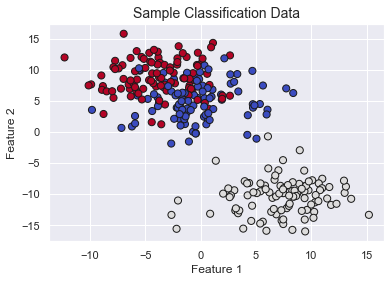

In [9]:
X, y = make_blobs(n_samples=300, centers=3,
                  cluster_std=3, random_state=14)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title('Sample Classification Data', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
# split the data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(240, 2)
(60, 2)


The following code snippet performs k-Nearest Neighbor classification with different values of `k` and comparing the performance using two different weighting schemes: uniform and distance-based weights. It then plots the accuracy scores for both weighting schemes across different values of k.

Here's a breakdown of what the code does:

1. **Loop Over k Values**: The code iterates over values of k from 1 to 50.


2. **Model Fitting and Prediction**: For each value of k, two k-NN classifiers are trained:
   - One with `weights='uniform'`: This uses uniform weighting, where all neighbors have equal weight.
   - One with `weights='distance'`: This uses distance-based weighting, where closer neighbors have higher influence.


3. **Accuracy Calculation**: After training each classifier, it predicts the labels for the test set and calculates the accuracy score using `metrics.accuracy_score()` from scikit-learn.


4. **Plotting**: The accuracy scores for both weighting schemes are stored in `score1` (uniform weights) and `score2` (distance weights) lists. These scores are then plotted against the values of k using Matplotlib.


5. **Visualization**: The resulting plot shows the accuracy scores for both weighting schemes across different values of k.

This code will produce two subplots: one for uniform weighting and another for distance-based weighting, showing the accuracy scores across different values of k. Adjustments to the visualization can be made as needed.

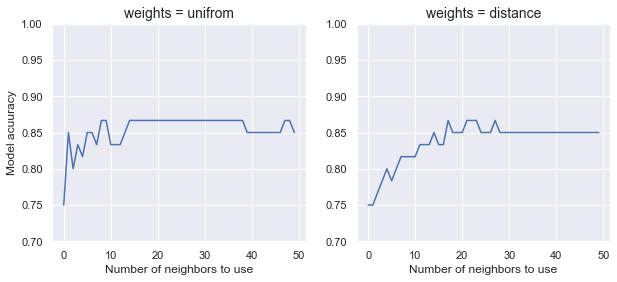

In [11]:
# k-Nearest-Neighbor Classifier
score1 = []
score2 = []
for k in range(1,51):
    knn_cls = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_cls.predict(X_test)
    score1.append(metrics.accuracy_score(y_test, y_pred))
    
    knn_cls = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train)
    y_pred = knn_cls.predict(X_test)
    score2.append(metrics.accuracy_score(y_test, y_pred))
    
fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(score1)
plt.ylim([0.7, 1])
plt.xlabel('Number of neighbors to use')
plt.ylabel('Model acuuracy')
plt.title('weights = unifrom', fontsize=14)

plt.subplot(1,2,2)
plt.plot(score2)
plt.ylim([0.7, 1])
plt.xlabel('Number of neighbors to use')
plt.title('weights = distance', fontsize=14)

plt.show()

In [12]:
# define function to plot decision boundaries for classification models

def PlotDB(X, y, style=0, model=None):
    """
    Function to plot the decision boundaries of a classification model.

    Inputs:
            X: Feature data with two coloumns as a NumPy-type array.
            y: Label data as a NumPy-type array.
            style: Can be 0 (without axis labels and ticks) or 1 otherwise
            model: A Scikit-learn ML estimator model 
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            PlotDB(X_train, y_train, KNeighborsClassifier, n_neighbors=5)
            plt.show()
    """
    if model is None:
        raise ValueError('Please provide a trained model.')
        
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    U, V = np.meshgrid(np.arange(x_min, x_max, .1), np.arange(y_min, y_max, .1))
    Z = model.predict(np.c_[U.ravel(), V.ravel()]).reshape(U.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.contourf(U, V, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    
    if style == 0:
        plt.xticks(())
        plt.yticks(())
    else:
        plt.xlabel('Feature-1')
        plt.ylabel('Feature-2')
    
    return plt

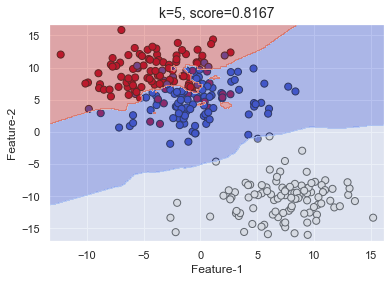

In [13]:
k = 5
plt.figure()

knn_cls = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
y_pred = knn_cls.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

PlotDB(X, y, 1, knn_cls)

plt.title('k=%d, score=%.4f' %(k, score), fontsize=14)

plt.show()

Let's plot decision boundaries for different values of k in a k-Nearest Neighbors classifier.

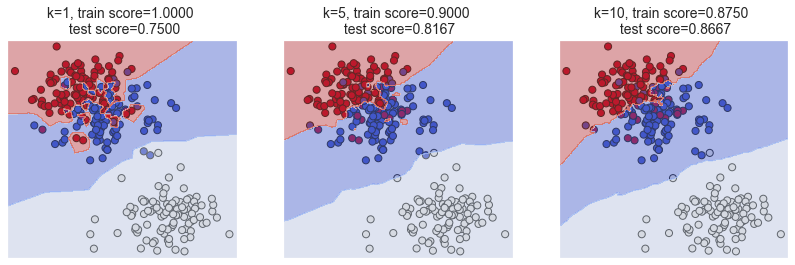

In [14]:
plt.figure(figsize=(14, 4))
k_range = np.array([1, 5, 10])

for i in range(3):
    
    plt.subplot(1, 3, i+1)
    
    knn_cls = KNeighborsClassifier(n_neighbors=k_range[i]).fit(X_train, y_train)
    
    y_pred = knn_cls.predict(X_train)
    train_score = metrics.accuracy_score(y_train, y_pred)
    
    y_pred = knn_cls.predict(X_test)    
    test_score = metrics.accuracy_score(y_test, y_pred)
    
    PlotDB(X, y, 0, knn_cls)
    plt.title('k=%d, train score=%.4f \n test score=%.4f'
              %(k_range[i], train_score, test_score), fontsize=14)
    
plt.show()

Based on the training and testing scores for different values of k in the k-Nearest Neighbors (kNN) classifier, we can make several observations:

1. **Overfitting**: When k=1, the training score is perfect (1.00), while the testing score is lower (0.75). This indicates potential overfitting, where the model performs exceptionally well on the training data but generalizes poorly to unseen data. With a low value of k (1), the model is too complex and captures noise in the training data, leading to decreased performance on the test set.

2. **Balanced Performance**: As k increases to 5 and 10, the training scores decrease slightly (0.90 and 0.88, respectively), but the testing scores increase (0.82 and 0.87, respectively). This suggests that the model's performance improves as it becomes less sensitive to individual data points (i.e., as k increases). The model achieves a better balance between bias and variance, leading to improved generalization performance on unseen data.

3. **Optimal Value of k**: From the results, it seems that k=10 yields the best performance on the test set (highest testing score of 0.87) while maintaining a reasonably high training score (0.88). This suggests that k=10 provides a good trade-off between bias and variance, resulting in a model that generalizes well to new data.

In summary, the results indicate that increasing the value of k from 1 to 10 improves the kNN classifier's performance on unseen data, leading to better generalization. This highlights the importance of tuning hyperparameters like k to optimize model performance and avoid overfitting.

## Find the best value for k
The following code searches for the optimal value of `n_neighbors` (k) for the k-Nearest Neighbors classifier using cross-validation. It helps to identify the value of k that yields the best performance on the training data while avoiding overfitting. Adjustments can be made to the range of values (k_range) and other parameters as needed.

In [15]:
from sklearn.model_selection import GridSearchCV

# specify a range of values for the number of neighbors (k)
k_range = range(1, 50)

# define a dictionary where the key is the parameter name and the value
# is the range of values to search over
parameters = {'n_neighbors': k_range}

# initializes a grid search cross-validation object
grid = GridSearchCV(KNeighborsClassifier(), parameters)

# perform the grid search over the specified parameter values 
grid.fit(X_train, y_train)

# print the best parameters found by the grid search
print('The best parameters are %s with a score of %0.4f'
      % (grid.best_params_, grid.best_score_))

The best parameters are {'n_neighbors': 35} with a score of 0.8750


The following code plots the mean test scores obtained during the grid search for different numbers of neighbors (k) in the k-Nearest Neighbors classifier. This visualization helps in understanding how the model's accuracy varies with different values of k.

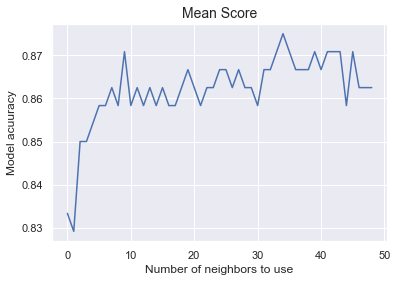

In [16]:
# plot the mean test scores obtained during the grid search
plt.plot(grid.cv_results_['mean_test_score'])

plt.xlabel('Number of neighbors to use')
plt.ylabel('Model acuuracy')
plt.title('Mean Score', fontsize=14)

plt.show()

# kNN for Regression Using scikit-learn

Let's see how to fit kNN models for regression tasks using scikit-learn.

In [17]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

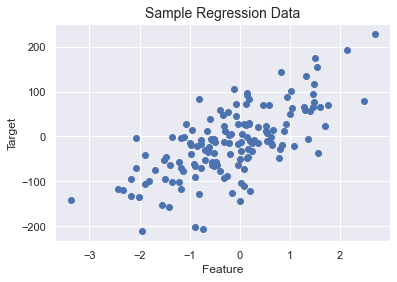

In [18]:
# Create sample regression data
X, y = make_regression(n_samples=150, n_features=1, noise=50, random_state=14)

plt.scatter(X, y, color='b', label='Data Points')

plt.title('Sample Regression Data', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [19]:
# split the data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(120, 1)
(30, 1)


In [20]:
# initialize and fit the kNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

The k-Nearest Neighbors (kNN) regressor does not provide coefficients for the regression line like linear regression models do. kNN is a non-parametric model, meaning it doesn't estimate parameters such as coefficients. Instead, it makes predictions based on the average or weighted average of the target values of its k nearest neighbors. If you need coefficients for the regression line, you may consider using a different regression model, such as linear regression, that provides coefficients.

However, we can plot the predicted target values for the test dataset.

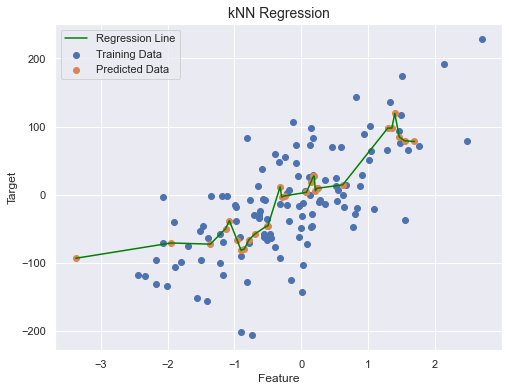

In [21]:
# predict the target values for the testing data
y_pred = knn_reg.predict(X_test)

plt.figure(figsize=(8,6))
# Plot the original data points
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_pred, label='Predicted Data')

# Sort the testing data for smoother regression line
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the regression line
plt.plot(X_test_sorted, y_pred_sorted, color='green', label='Regression Line')

# Add labels and legend
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('kNN Regression', fontsize=14)
plt.legend()

plt.show()

## Evaluate Regression Models

There are several metrics commonly used to evaluate regression models. Here are some of the most commonly used ones:

1. **Mean Squared Error (MSE)**: This metric calculates the average squared difference between the predicted values and the true values. MSE is sensitive to outliers as it squares the differences.

   $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^2 $$
   

2. **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE and is in the same units as the target variable. It provides a more interpretable measure of error compared to MSE.

   $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^2} $$
   

3. **Mean Absolute Error (MAE)**: MAE calculates the average absolute difference between the predicted values and the true values. It is less sensitive to outliers compared to MSE.

   $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y_{i}}| $$
   

4. **R-squared (R²) Score**: R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates perfect predictions and 0 indicates that the model does not explain any variability in the target variable better than a simple mean.

   $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^2}{\sum_{i=1}^{n} (y_{i} - \bar{y})^2} $$
   

5. **Mean Absolute Percentage Error (MAPE)**: MAPE calculates the average percentage difference between the predicted values and the true values. It provides a relative measure of error, which can be useful for understanding the accuracy of predictions relative to the scale of the target variable.

   $$ \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{|y_{i} - \hat{y_{i}}|}{|y_{i}|} \right) \times 100 $$

These metrics provide different perspectives on the performance of regression models and can be used depending on the specific requirements of the problem and the characteristics of the data.

In [22]:
# predict on the testing data
y_pred = knn_reg.predict(X_test)

# define the left and right alignment widths for printing
l = 38  # Left alignment width
r = 7   # Right alignment width

# print the evaluation metrics with appropriate alignment and formatting
print('Mean Squared Error (MSE):'.ljust(l),
      '{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)).rjust(r))

print('Root Mean Squared Error (RMSE):'.ljust(l),
      '{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))).rjust(r))

print('Mean Absolute Error (MAE):'.ljust(l),
      '{:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)).rjust(r))

print('Mean Absolute Percentage Error (MAPE):'.ljust(l),
       '{:.2f}'.format(metrics.mean_absolute_percentage_error(y_test, y_pred)).rjust(r))

print('R-squared Score:'.ljust(l),
       '{:.2f}'.format(metrics.r2_score(y_test, y_pred)).rjust(r))

Mean Squared Error (MSE):              4057.42
Root Mean Squared Error (RMSE):          63.70
Mean Absolute Error (MAE):               51.31
Mean Absolute Percentage Error (MAPE):    2.04
R-squared Score:                          0.26
